In [228]:
import pandas as pd
import numpy as np

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from importlib import reload

import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

from wordcloud import WordCloud, ImageColorGenerator

import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
#load the Disneyland Reviews file
df = pd.read_csv('DisneylandReviews.csv')

In [3]:
#call the first five row to ensure the data loaded properly
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
#the number of records
df.count()

Review_ID            42656
Rating               42656
Year_Month           42656
Reviewer_Location    42656
Review_Text          42656
Branch               42656
dtype: int64

In [5]:
#the number of distinct records in each column
df.nunique()

Review_ID            42636
Rating                   5
Year_Month             112
Reviewer_Location      162
Review_Text          42632
Branch                   3
dtype: int64

In [6]:
#drop duplicates from the Review_Text
df.drop_duplicates(subset='Review_Text', inplace=True, ignore_index=True)

In [7]:
#recheck the number of records after duplicates have been removed
df.count()

Review_ID            42632
Rating               42632
Year_Month           42632
Reviewer_Location    42632
Review_Text          42632
Branch               42632
dtype: int64

In [8]:
#the number of distinct records in each column
df.nunique()

Review_ID            42624
Rating                   5
Year_Month             112
Reviewer_Location      162
Review_Text          42632
Branch                   3
dtype: int64

In [9]:
#Determine if the duplicates in Review_ID are actually duplicated records   
df[df['Review_ID'].duplicated(keep=False)].sort_values('Review_ID')

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
9165,121615136,5,2011-12,Singapore,"What's there not to like about Disneyland, esp...",Disneyland_HongKong
9175,121615136,5,2011-12,Singapore,"What's there not to like about Disneyland, esp...",Disneyland_HongKong
9164,121615246,4,2011-12,India,I visited Hong Kong Disneyland with my family ...,Disneyland_HongKong
9174,121615246,4,2011-12,India,I visited Hong Kong Disneyland with my family ...,Disneyland_HongKong
7938,164830205,3,2012-7,United States,"If you've visited DisneyWorld in Orlando, your...",Disneyland_HongKong
7947,164830205,3,2012-7,United States,"If you've visited DisneyWorld in Orlando, your...",Disneyland_HongKong
24004,166730734,3,2013-3,Australia,I say that I was a little disappointed by Disn...,Disneyland_California
24010,166730734,3,2013-3,Australia,I say that I was a little disappointed by Disn...,Disneyland_California
24003,166753649,5,2013-7,United States,Went to Disneyland and California Adventure on...,Disneyland_California
24009,166753649,5,2013-7,United States,Went to Disneyland and California Adventure on...,Disneyland_California


In [10]:
#drop duplicates from the Review_ID
df.drop_duplicates(subset='Review_ID', inplace=True, ignore_index=True)

In [11]:
#recheck the number of records after duplicates have been removed
df.count()

Review_ID            42624
Rating               42624
Year_Month           42624
Reviewer_Location    42624
Review_Text          42624
Branch               42624
dtype: int64

In [12]:
#number of records with missing data
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [13]:
df[['Year_Month', 'Reviewer_Location', 'Branch']].describe()

,Year_Month,Reviewer_Location,Branch
count,42624,42624,42624
unique,112,162,3
top,missing,United States,Disneyland_California
freq,2610,14536,19395


In [14]:
df.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [15]:
#find the number of missing values in each column
print(df[df['Review_ID'] == 'missing']['Review_ID'].count())
print(df[df['Rating'] == 'missing']['Review_ID'].count())
print(df[df['Year_Month'] == 'missing']['Review_ID'].count())
print(df[df['Reviewer_Location'] == 'missing']['Review_ID'].count())
print(df[df['Review_Text'] == 'missing']['Review_ID'].count())
print(df[df['Branch'] == 'missing']['Review_ID'].count())

0
0
2610
0
0
0


In [16]:
df.groupby('Branch')['Review_ID'].count()

Branch
Disneyland_California    19395
Disneyland_HongKong       9602
Disneyland_Paris         13627
Name: Review_ID, dtype: int64

In [17]:
df[df['Year_Month'] == 'missing'].groupby('Branch')['Review_ID'].count()

Branch
Disneyland_California    1203
Disneyland_HongKong       471
Disneyland_Paris          936
Name: Review_ID, dtype: int64

In [18]:
#dates not missing in each branch
print(1204/19460)
print(473/9620)
print(936/13630)
print((1204+473+936)/42656)

0.0618705035971223
0.04916839916839917
0.06867204695524579
0.06125750187546887


In [19]:
#remove records where date is missing
df_cleaned = df[df['Year_Month'] != 'missing'].reset_index(drop=True)

In [20]:
df_cleaned.count()

Review_ID            40014
Rating               40014
Year_Month           40014
Reviewer_Location    40014
Review_Text          40014
Branch               40014
dtype: int64

In [21]:
df_cleaned['Branch'] = df_cleaned['Branch'].str.replace('Disneyland_', '')

In [22]:
df_cleaned.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong


In [23]:
df_cleaned['Year'] = ''

In [24]:
for i in range(len(df_cleaned)):
    df_cleaned['Year'][i] = df_cleaned['Year_Month'][i][0:4]

<ipython-input-24-ef56037adcd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'][i] = df_cleaned['Year_Month'][i][0:4]


In [25]:
df_cleaned.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,2019
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019


In [26]:
df_Branch = df_cleaned.groupby('Branch')['Review_ID'].count()
df_Branch

Branch
California    18192
HongKong       9131
Paris         12691
Name: Review_ID, dtype: int64

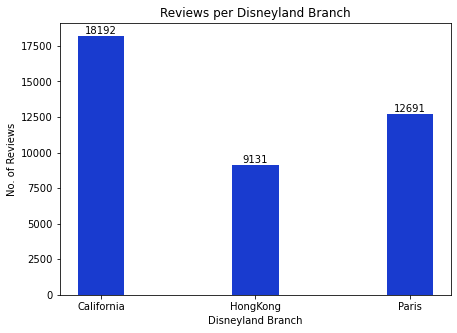

In [27]:
plt.figure(figsize = (7, 5))
plt.bar(df_Branch.index, df_Branch, color='#193bcf', width = .3)
plt.xlabel('Disneyland Branch')
plt.ylabel('No. of Reviews')
plt.title('Reviews per Disneyland Branch')

for i in range(len(df_Branch.index)):
    plt.text(i, df_Branch[i], df_Branch[i], ha='center', va = 'bottom')

plt.show;

In [28]:
df_Rating = df_cleaned.groupby('Rating')['Review_ID'].count()
df_Rating

Rating
1     1338
2     1928
3     4778
4    10076
5    21894
Name: Review_ID, dtype: int64

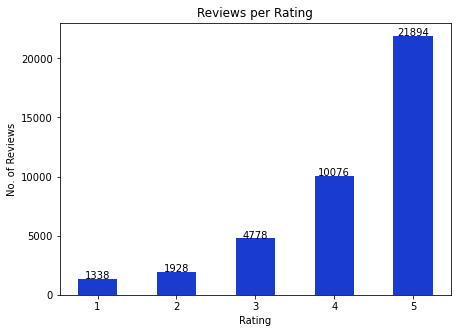

In [29]:
plt.figure(figsize = (7, 5))
plt.bar(df_Rating.index, df_Rating, color='#193bcf', width = .5)
plt.xlabel('Rating')
plt.ylabel('No. of Reviews')
plt.title('Reviews per Rating')

for i in range(1, 6):
    plt.text(i, df_Rating[i], df_Rating[i], ha='center')

plt.show;

In [30]:
df_Year = df_cleaned.groupby('Year')['Review_ID'].count()
df_Year

Year
2010     143
2011    1975
2012    4339
2013    4707
2014    5297
2015    6978
2016    6598
2017    5195
2018    3996
2019     786
Name: Review_ID, dtype: int64

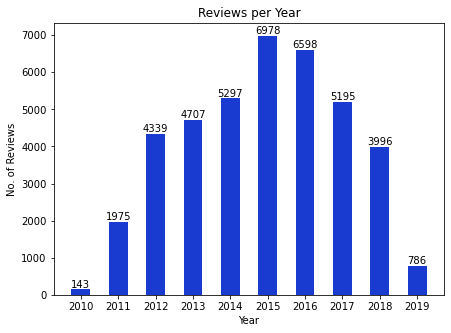

In [31]:
plt.figure(figsize = (7, 5))
plt.bar(df_Year.index, df_Year, color='#193bcf', width = .5)
plt.xlabel('Year')
plt.ylabel('No. of Reviews')
plt.title('Reviews per Year')

for i in range(len(df_Year.index)):
    plt.text(i, df_Year[i], df_Year[i], ha='center', va = 'bottom')

plt.show;

In [32]:
df_Location = df_cleaned.groupby('Reviewer_Location')['Review_ID'].count()
df_Location

Reviewer_Location
Afghanistan             2
Albania                 6
Algeria                 2
Andorra                 1
Antigua and Barbuda     1
                       ..
Venezuela               3
Vietnam                55
Zambia                  3
Zimbabwe                2
�land Islands           1
Name: Review_ID, Length: 162, dtype: int64

In [33]:
df_cleaned

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,2019
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019
...,...,...,...,...,...,...,...
40009,92198076,4,2011-1,United Kingdom,Although our pick up was prompt the taxi drive...,Paris,2011
40010,92061774,4,2011-1,Germany,Just returned from a 4 days family trip to Dis...,Paris,2011
40011,91995748,1,2010-12,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Paris,2010
40012,91984642,2,2010-12,United Kingdom,Well I was really looking forward to this trip...,Paris,2010


In [34]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [35]:
n_components = 5
n_top_words = 15

In [36]:
sw = stopwords.words('english')

In [37]:
sw.append('park')
sw.append('disneyland')
sw.append('disney')


In [38]:
vect = CountVectorizer(max_df = 0.95, min_df = 2,
                      stop_words = sw)

tf = vect.fit_transform(df_cleaned['Review_Text'])

In [39]:
lda = LatentDirichletAllocation(n_components=n_components, 
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [40]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=0)

In [41]:
print("\nTopics in LDA model:")
tf_feature_names = vect.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0: staff paris people would children us experience even many like one closed year cast queue
Topic #1: mountain ride space world pirates thunder star jones indiana closed california big like magic caribbean
Topic #2: rides time day great go place kids visit good really see fun one much food
Topic #3: get day rides time fast pass one ride go minutes wait hotel line would people
Topic #4: show ride water train mickey main land parade coaster also castle small good food take



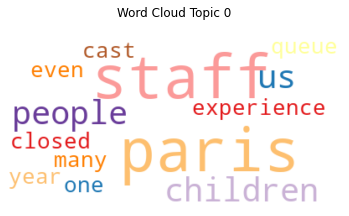

In [42]:
#create word cloud for topic 0
plt = reload(plt)
wordcloud = WordCloud(background_color='white', colormap='Paired').generate('staff paris people would children us experience even many like one closed year cast queue')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud Topic 0', pad = 25)
plt.show()

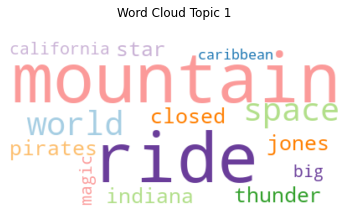

In [43]:
#create word cloud for topic 1
plt = reload(plt)
wordcloud = WordCloud(background_color='white', colormap='Paired').generate('mountain ride space world pirates thunder star jones indiana closed california big like magic caribbean')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud Topic 1', pad = 25)
plt.show()

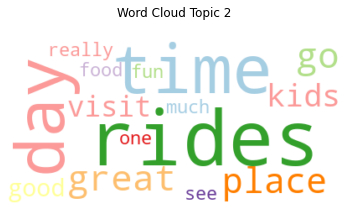

In [44]:
#create word cloud for topic 2
plt = reload(plt)
wordcloud = WordCloud(background_color='white', colormap='Paired').generate('rides time day great go place kids visit good really see fun one much food')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud Topic 2', pad = 25)
plt.show()

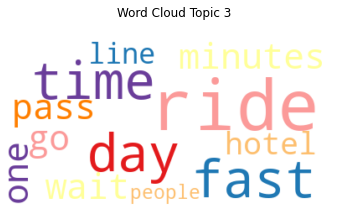

In [45]:
#create word cloud for topic 3
plt = reload(plt)
wordcloud = WordCloud(background_color='white', colormap='Paired').generate('get day rides time fast pass one ride go minutes wait hotel line would people')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud Topic 3', pad = 25)
plt.show()

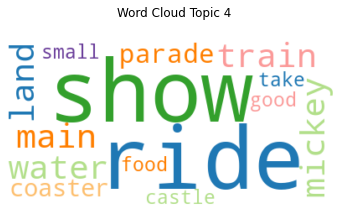

In [46]:
#create word cloud for topic 4
plt = reload(plt)
wordcloud = WordCloud(background_color='white', colormap='Paired').generate('show ride water train mickey main land parade coaster also castle small good food take')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud Topic 4', pad = 25)
plt.show()

In [47]:
# Creat Document - Topic Matrix
lda_output = lda.transform(tf)
lda_output

array([[0.00685807, 0.00681696, 0.50374229, 0.00678475, 0.47579792],
       [0.1422872 , 0.24900476, 0.39005423, 0.00211969, 0.21653412],
       [0.00253675, 0.00251865, 0.74743834, 0.24497388, 0.00253238],
       ...,
       [0.29096239, 0.06810685, 0.05898316, 0.46624427, 0.11570334],
       [0.32510102, 0.10049603, 0.17711496, 0.24001287, 0.15727513],
       [0.00348917, 0.05216198, 0.00354715, 0.58891718, 0.35188452]])

In [48]:
# column names
themeNames = ["Theme_" + str(i) for i in range (lda.n_components)]
themeNames

['Theme_0', 'Theme_1', 'Theme_2', 'Theme_3', 'Theme_4']

In [49]:
# index names
idNames = [i for i in range(len(df_cleaned))]

In [50]:
# Make the pandas dataframe

df_themes = pd.DataFrame(np.round(lda_output, 2), columns = themeNames, index = idNames)
df_themes


,Theme_0,Theme_1,Theme_2,Theme_3,Theme_4
0,0.01,0.01,0.50,0.01,0.48
1,0.14,0.25,0.39,0.00,0.22
2,0.00,0.00,0.75,0.24,0.00
3,0.00,0.39,0.41,0.12,0.07
4,0.01,0.01,0.95,0.01,0.01
...,...,...,...,...,...
40009,0.17,0.03,0.00,0.79,0.01
40010,0.07,0.04,0.26,0.44,0.18
40011,0.29,0.07,0.06,0.47,0.12
40012,0.33,0.10,0.18,0.24,0.16


In [51]:
# Get dominant topic for each document
dominant_theme = np.argmax(df_themes.values, axis = 1)
df_themes['dominant_theme'] = dominant_theme

In [52]:
df_themes

,Theme_0,Theme_1,Theme_2,Theme_3,Theme_4,dominant_theme
0,0.01,0.01,0.50,0.01,0.48,2
1,0.14,0.25,0.39,0.00,0.22,2
2,0.00,0.00,0.75,0.24,0.00,2
3,0.00,0.39,0.41,0.12,0.07,2
4,0.01,0.01,0.95,0.01,0.01,2
...,...,...,...,...,...,...
40009,0.17,0.03,0.00,0.79,0.01,3
40010,0.07,0.04,0.26,0.44,0.18,3
40011,0.29,0.07,0.06,0.47,0.12,3
40012,0.33,0.10,0.18,0.24,0.16,0


In [53]:
theme_breakdown = df_themes.groupby('dominant_theme',)['dominant_theme'].count()
theme_breakdown

dominant_theme
0     3431
1     1521
2    25806
3     7993
4     1263
Name: dominant_theme, dtype: int64

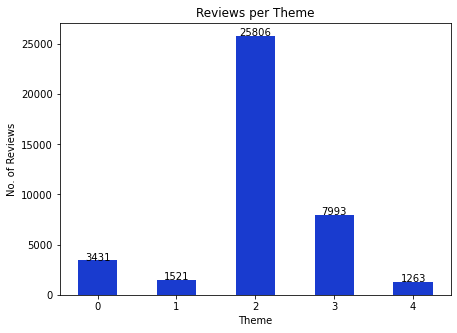

In [54]:
plt.figure(figsize = (7, 5))
plt.bar(theme_breakdown.index, theme_breakdown, color='#193bcf', width = .5)
plt.xlabel('Theme')
plt.ylabel('No. of Reviews')
plt.title('Reviews per Theme')

for i in range(0, 5):
    plt.text(i, theme_breakdown[i], theme_breakdown[i], ha='center')

plt.show;

In [55]:
df_cleaned = pd.concat([df_cleaned, df_themes], axis = 1)

In [56]:
df_cleaned.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Theme_0,Theme_1,Theme_2,Theme_3,Theme_4,dominant_theme
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,0.01,0.01,0.50,0.01,0.48,2
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,0.14,0.25,0.39,0.00,0.22,2
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,0.00,0.00,0.75,0.24,0.00,2
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,0.00,0.39,0.41,0.12,0.07,2
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,0.01,0.01,0.95,0.01,0.01,2


In [57]:
ratingTheme = df_cleaned.groupby(['Rating', 'dominant_theme'])['dominant_theme'].count().reset_index(name='count')
ratingTheme

,Rating,dominant_theme,count
0,1,0,415
1,1,1,16
2,1,2,145
3,1,3,757
4,1,4,5
5,2,0,607
6,2,1,35
7,2,2,413
8,2,3,853
9,2,4,20


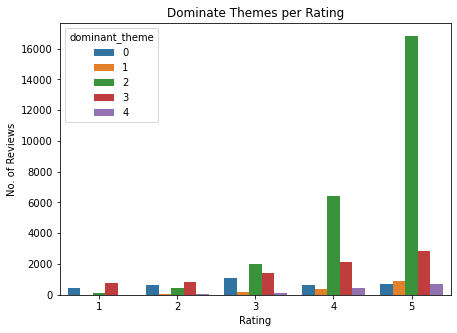

In [58]:
plt.figure(figsize = (7, 5))
sns.barplot(x = 'Rating', y = 'count', hue = 'dominant_theme', data = ratingTheme)
plt.title('Dominate Themes per Rating')
plt.ylabel('No. of Reviews')
plt.show()

In [59]:
sia = SentimentIntensityAnalyzer()

In [60]:
df_cleaned['pos'] = ''
df_cleaned['neu'] = ''
df_cleaned['neg'] = ''
df_cleaned['sentiment'] = ''

In [61]:
for i in range(len(df_cleaned)):
    sentiment = sia.polarity_scores(df_cleaned['Review_Text'][i])
    df_cleaned['pos'][i] = sentiment['pos']
    df_cleaned['neu'][i] = sentiment['neu']
    df_cleaned['neg'][i] = sentiment['neg']
    df_cleaned['sentiment'][i] = sentiment['compound']

<ipython-input-61-e952446d992c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pos'][i] = sentiment['pos']
<ipython-input-61-e952446d992c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['neu'][i] = sentiment['neu']
<ipython-input-61-e952446d992c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['neg'][i] = sentiment['neg']
<ipython-input-61-e952446d992c>:6: SettingWithCopyWarning: 
A value is tryin

In [62]:
df_cleaned.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Theme_0,Theme_1,Theme_2,Theme_3,Theme_4,dominant_theme,pos,neu,neg,sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,0.01,0.01,0.50,0.01,0.48,2,0.113,0.887,0.0,0.7069
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,0.14,0.25,0.39,0.00,0.22,2,0.231,0.73,0.04,0.9901
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,0.00,0.00,0.75,0.24,0.00,2,0.235,0.742,0.024,0.992
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,0.00,0.39,0.41,0.12,0.07,2,0.16,0.76,0.08,0.8489
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,0.01,0.01,0.95,0.01,0.01,2,0.101,0.899,0.0,0.2846


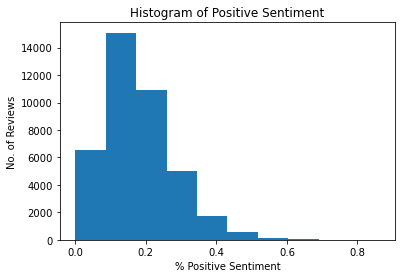

In [63]:
#create a histogram for positive sentiment
plt.hist(df_cleaned['pos'])
plt.title('Histogram of Positive Sentiment')
plt.xlabel('% Positive Sentiment')
plt.ylabel('No. of Reviews')
plt.show()

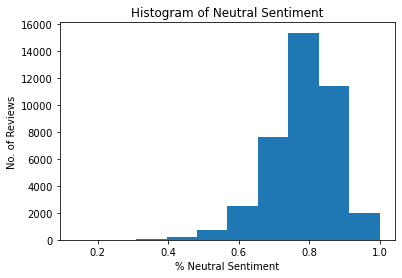

In [64]:
#create a histogram for neutral sentiment
plt.hist(df_cleaned['neu'])
plt.title('Histogram of Neutral Sentiment')
plt.xlabel('% Neutral Sentiment')
plt.ylabel('No. of Reviews')
plt.show()

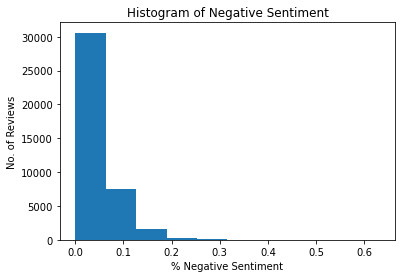

In [65]:
#create a histogram for neutral sentiment
plt.hist(df_cleaned['neg'])
plt.title('Histogram of Negative Sentiment')
plt.xlabel('% Negative Sentiment')
plt.ylabel('No. of Reviews')
plt.show()

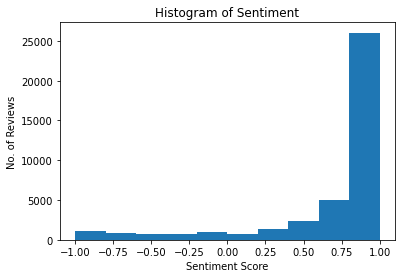

In [66]:
#create a histogram for neutral sentiment
plt.hist(df_cleaned['sentiment'])
plt.title('Histogram of Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('No. of Reviews')
plt.show()

In [67]:
df_cleaned.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch', 'Year', 'Theme_0', 'Theme_1', 'Theme_2', 'Theme_3', 'Theme_4',
       'dominant_theme', 'pos', 'neu', 'neg', 'sentiment'],
      dtype='object')

In [68]:
df_cleaned[['Theme_0', 'Theme_1', 'Theme_2', 'Theme_3', 'Theme_4', 'pos', 'neu', 'neg', 'sentiment']].head()

,Theme_0,Theme_1,Theme_2,Theme_3,Theme_4,pos,neu,neg,sentiment
0,0.01,0.01,0.50,0.01,0.48,0.113,0.887,0.0,0.7069
1,0.14,0.25,0.39,0.00,0.22,0.231,0.73,0.04,0.9901
2,0.00,0.00,0.75,0.24,0.00,0.235,0.742,0.024,0.992
3,0.00,0.39,0.41,0.12,0.07,0.16,0.76,0.08,0.8489
4,0.01,0.01,0.95,0.01,0.01,0.101,0.899,0.0,0.2846


In [69]:
df_cleaned = df_cleaned.astype({'pos': 'float64', 'neu': 'float64', 'neg': 'float64', 'sentiment': 'float64'})

In [70]:
corr_matrix = df_cleaned[['Theme_0', 'Theme_1', 'Theme_2', 'Theme_3', 'Theme_4', 'dominant_theme', 'pos', 'neu', 'neg', 'sentiment']].corr()

In [71]:
df_cleaned.dtypes

Review_ID              int64
Rating                 int64
Year_Month            object
Reviewer_Location     object
Review_Text           object
Branch                object
Year                  object
Theme_0              float64
Theme_1              float64
Theme_2              float64
Theme_3              float64
Theme_4              float64
dominant_theme         int64
pos                  float64
neu                  float64
neg                  float64
sentiment            float64
dtype: object

In [72]:
corr_matrix

,Theme_0,Theme_1,Theme_2,Theme_3,Theme_4,dominant_theme,pos,neu,neg,sentiment
Theme_0,1.000000,-0.054428,-0.463371,-0.015793,-0.159876,-0.490246,-0.229741,0.062558,0.372891,-0.302059
Theme_1,-0.054428,1.000000,-0.314383,-0.116472,-0.018152,-0.177924,-0.043705,0.019335,0.055609,-0.006793
Theme_2,-0.463371,-0.314383,1.000000,-0.646494,-0.244164,-0.051791,0.469699,-0.333988,-0.338156,0.297560
Theme_3,-0.015793,-0.116472,-0.646494,1.000000,-0.119830,0.381317,-0.403601,0.347169,0.166697,-0.208747
Theme_4,-0.159876,-0.018152,-0.244164,-0.119830,1.000000,0.276138,-0.028946,0.058885,-0.057972,0.080578
dominant_theme,-0.490246,-0.177924,-0.051791,0.381317,0.276138,1.000000,-0.043330,0.114136,-0.140335,0.099736
pos,-0.229741,-0.043705,0.469699,-0.403601,-0.028946,-0.043330,1.000000,-0.890501,-0.350555,0.540413
neu,0.062558,0.019335,-0.333988,0.347169,0.058885,0.114136,-0.890501,1.000000,-0.113921,-0.268782
neg,0.372891,0.055609,-0.338156,0.166697,-0.057972,-0.140335,-0.350555,-0.113921,1.000000,-0.626775
sentiment,-0.302059,-0.006793,0.297560,-0.208747,0.080578,0.099736,0.540413,-0.268782,-0.626775,1.000000


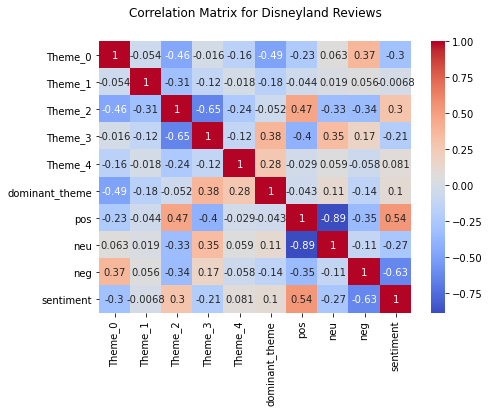

In [73]:
plt = reload(plt)
plt.figure(figsize = (7, 5))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix for Disneyland Reviews', pad=25)
plt.show()

In [74]:
#remove neutral sentiment score
df_cleaned = df_cleaned[['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch', 'Year', 'Theme_0', 'Theme_1', 'Theme_2', 'Theme_3', 'Theme_4',
       'dominant_theme', 'pos', 'neg', 'sentiment']]

In [75]:
df_trim = df_cleaned.copy()

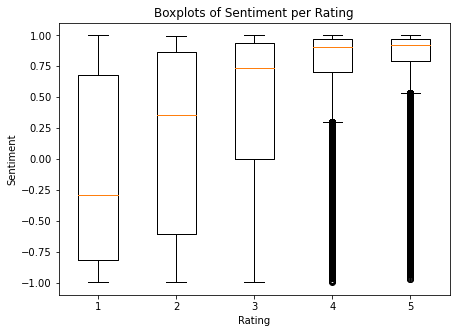

In [76]:
plt.figure(figsize = (7, 5))

rating1 = df_trim[df_trim['Rating'] == 1]['sentiment']
rating2 = df_trim[df_trim['Rating'] == 2]['sentiment']
rating3 = df_trim[df_trim['Rating'] == 3]['sentiment']
rating4 = df_trim[df_trim['Rating'] == 4]['sentiment']
rating5 = df_trim[df_trim['Rating'] == 5]['sentiment']

plt.boxplot([rating1, rating2, rating3, rating4, rating5])
plt.title('Boxplots of Sentiment per Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.show()


In [77]:
#Calculate the Lower Fence for the Rating 4
rating4_q1 = df_trim[df_trim['Rating'] == 4]['sentiment'].quantile(0.25)
rating4_q3 = df_trim[df_trim['Rating'] == 4]['sentiment'].quantile(0.75)
rating4_IQR = rating4_q3 - rating4_q1
rating4_lowerFloor = rating4_q1 - (1.5 * rating4_IQR)
rating4_lowerFloor


0.29835000000000006

In [78]:
#Calculate the Lower Fence for the Rating 5
rating5_q1 = df_trim[df_trim['Rating'] == 5]['sentiment'].quantile(0.25)
rating5_q3 = df_trim[df_trim['Rating'] == 5]['sentiment'].quantile(0.75)
rating5_IQR = rating5_q3 - rating5_q1
rating5_lowerFloor = rating5_q1 - (1.5 * rating5_IQR)
rating5_lowerFloor

0.5338500000000002

In [79]:
len(df_trim)

40014

In [80]:
#remove outliers for Rating class 5
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 5) & (df_trim.sentiment < rating5_lowerFloor)].index).reset_index(drop=True)

In [81]:
len(df_trim)

37663

In [82]:
#remove outliers for Rating class 4
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 4) & (df_trim.sentiment < rating4_lowerFloor)].index).reset_index(drop=True)

In [83]:
len(df_trim)

36459

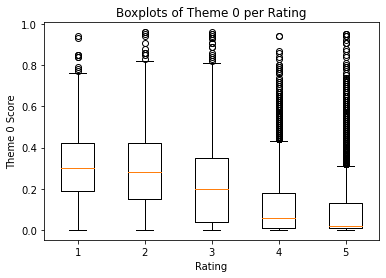

In [84]:
#create boxplot for Theme 0
rating1 = df_trim[df_trim['Rating'] == 1]['Theme_0']
rating2 = df_trim[df_trim['Rating'] == 2]['Theme_0']
rating3 = df_trim[df_trim['Rating'] == 3]['Theme_0']
rating4 = df_trim[df_trim['Rating'] == 4]['Theme_0']
rating5 = df_trim[df_trim['Rating'] == 5]['Theme_0']

plt.boxplot([rating1, rating2, rating3, rating4, rating5])
plt.title('Boxplots of Theme 0 per Rating')
plt.xlabel('Rating')
plt.ylabel('Theme 0 Score')
plt.show()


In [85]:
#Calculate Upper Floor for Rating 1 Theme 0
theme0Rating1_q1 = df_trim[df_trim['Rating'] == 1]['Theme_0'].quantile(0.25)
theme0Rating1_q3 = df_trim[df_trim['Rating'] == 1]['Theme_0'].quantile(0.75)
theme0Rating1_IQR = theme0Rating1_q3 - theme0Rating1_q1
theme0Rating1_upperFloor = theme0Rating1_q3 + (1.5 * theme0Rating1_IQR)
theme0Rating1_upperFloor

0.7649999999999999

In [86]:
#Remove outliers from Rating 1 Theme_0
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 1) & (df_trim.Theme_0 > theme0Rating1_upperFloor)].index).reset_index(drop=True)

In [87]:
len(df_trim)

36449

In [88]:
#Calculate Upper Floor for Rating 2 Theme 0
theme0Rating2_q1 = df_trim[df_trim['Rating'] == 2]['Theme_0'].quantile(0.25)
theme0Rating2_q3 = df_trim[df_trim['Rating'] == 2]['Theme_0'].quantile(0.75)
theme0Rating2_IQR = theme0Rating2_q3 - theme0Rating2_q1
theme0Rating2_upperFloor = theme0Rating2_q3 + (1.5 * theme0Rating2_IQR)
theme0Rating2_upperFloor

0.825

In [89]:
#Remove outliers from Rating 2 Theme_0
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 2) & (df_trim.Theme_0 > theme0Rating2_upperFloor)].index).reset_index(drop=True)

In [90]:
len(df_trim)

36438

In [91]:
#Calculate Upper Floor for Rating 3 Theme 0
theme0Rating3_q1 = df_trim[df_trim['Rating'] == 3]['Theme_0'].quantile(0.25)
theme0Rating3_q3 = df_trim[df_trim['Rating'] == 3]['Theme_0'].quantile(0.75)
theme0Rating3_IQR = theme0Rating3_q3 - theme0Rating3_q1
theme0Rating3_upperFloor = theme0Rating3_q3 + (1.5 * theme0Rating3_IQR)
theme0Rating3_upperFloor

0.815

In [92]:
#Remove outliers from Rating 3 Theme_0
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 3) & (df_trim.Theme_0 > theme0Rating3_upperFloor)].index).reset_index(drop=True)

In [93]:
len(df_trim)

36422

In [94]:
#Calculate Upper Floor for Rating 4 Theme 0
theme0Rating4_q1 = df_trim[df_trim['Rating'] == 4]['Theme_0'].quantile(0.25)
theme0Rating4_q3 = df_trim[df_trim['Rating'] == 4]['Theme_0'].quantile(0.75)
theme0Rating4_IQR = theme0Rating4_q3 - theme0Rating4_q1
theme0Rating4_upperFloor = theme0Rating4_q3 + (1.5 * theme0Rating4_IQR)
theme0Rating4_upperFloor

0.435

In [95]:
#Remove outliers from Rating 3 Theme_0
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 4) & (df_trim.Theme_0 > theme0Rating4_upperFloor)].index).reset_index(drop=True)

In [96]:
len(df_trim)

36154

In [97]:
#Calculate Upper Floor for Rating 5 Theme 0
theme0Rating5_q1 = df_trim[df_trim['Rating'] == 5]['Theme_0'].quantile(0.25)
theme0Rating5_q3 = df_trim[df_trim['Rating'] == 5]['Theme_0'].quantile(0.75)
theme0Rating5_IQR = theme0Rating5_q3 - theme0Rating5_q1
theme0Rating5_upperFloor = theme0Rating5_q3 + (1.5 * theme0Rating5_IQR)
theme0Rating5_upperFloor

0.31000000000000005

In [98]:
#Remove outliers from Rating 3 Theme_0
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 5) & (df_trim.Theme_0 > theme0Rating5_upperFloor)].index).reset_index(drop=True)

In [99]:
len(df_trim)

35051

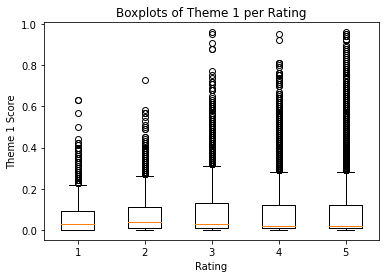

In [100]:
#create boxplot for Theme 1
rating1 = df_trim[df_trim['Rating'] == 1]['Theme_1']
rating2 = df_trim[df_trim['Rating'] == 2]['Theme_1']
rating3 = df_trim[df_trim['Rating'] == 3]['Theme_1']
rating4 = df_trim[df_trim['Rating'] == 4]['Theme_1']
rating5 = df_trim[df_trim['Rating'] == 5]['Theme_1']

plt.boxplot([rating1, rating2, rating3, rating4, rating5])
plt.title('Boxplots of Theme 1 per Rating')
plt.xlabel('Rating')
plt.ylabel('Theme 1 Score')
plt.show()

In [101]:
#Calculate Upper Floor for Rating 1 Theme 0
theme1Rating1_q1 = df_trim[df_trim['Rating'] == 1]['Theme_1'].quantile(0.25)
theme1Rating1_q3 = df_trim[df_trim['Rating'] == 1]['Theme_1'].quantile(0.75)
theme1Rating1_IQR = theme1Rating1_q3 - theme1Rating1_q1
theme1Rating1_upperFloor = theme1Rating1_q3 + (1.5 * theme1Rating1_IQR)
theme1Rating1_upperFloor

0.225

In [102]:
#Remove outliers from Rating 1 Theme_1
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 1) & (df_trim.Theme_1 > theme1Rating1_upperFloor)].index).reset_index(drop=True)

In [103]:
len(df_trim)

34990

In [104]:
#Calculate Upper Floor for Rating 2 Theme 0
theme1Rating2_q1 = df_trim[df_trim['Rating'] == 2]['Theme_1'].quantile(0.25)
theme1Rating2_q3 = df_trim[df_trim['Rating'] == 2]['Theme_1'].quantile(0.75)
theme1Rating2_IQR = theme1Rating2_q3 - theme1Rating2_q1
theme1Rating2_upperFloor = theme1Rating2_q3 + (1.5 * theme1Rating2_IQR)
theme1Rating2_upperFloor

0.26

In [105]:
#Remove outliers from Rating 2 Theme_1
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 2) & (df_trim.Theme_1 > theme1Rating2_upperFloor)].index).reset_index(drop=True)

In [106]:
len(df_trim)

34899

In [107]:
#Calculate Upper Floor for Rating 3 Theme 1
theme1Rating3_q1 = df_trim[df_trim['Rating'] == 3]['Theme_1'].quantile(0.25)
theme1Rating3_q3 = df_trim[df_trim['Rating'] == 3]['Theme_1'].quantile(0.75)
theme1Rating3_IQR = theme1Rating3_q3 - theme1Rating3_q1
theme1Rating3_upperFloor = theme1Rating3_q3 + (1.5 * theme1Rating3_IQR)
theme1Rating3_upperFloor

0.31000000000000005

In [108]:
#Remove outliers from Rating 3 Theme_1
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 3) & (df_trim.Theme_1 > theme1Rating3_upperFloor)].index).reset_index(drop=True)

In [109]:
len(df_trim)

34635

In [110]:
#Calculate Upper Floor for Rating 4 Theme 1
theme1Rating4_q1 = df_trim[df_trim['Rating'] == 4]['Theme_1'].quantile(0.25)
theme1Rating4_q3 = df_trim[df_trim['Rating'] == 4]['Theme_1'].quantile(0.75)
theme1Rating4_IQR = theme1Rating4_q3 - theme1Rating4_q1
theme1Rating4_upperFloor = theme1Rating4_q3 + (1.5 * theme1Rating4_IQR)
theme1Rating4_upperFloor

0.28500000000000003

In [111]:
#Remove outliers from Rating 4 Theme_1
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 4) & (df_trim.Theme_1 > theme1Rating4_upperFloor)].index).reset_index(drop=True)

In [112]:
len(df_trim)

34004

In [113]:
#Calculate Upper Floor for Rating 5 Theme 1
theme1Rating5_q1 = df_trim[df_trim['Rating'] == 5]['Theme_1'].quantile(0.25)
theme1Rating5_q3 = df_trim[df_trim['Rating'] == 5]['Theme_1'].quantile(0.75)
theme1Rating5_IQR = theme1Rating5_q3 - theme1Rating5_q1
theme1Rating5_upperFloor = theme1Rating5_q3 + (1.5 * theme1Rating5_IQR)
theme1Rating5_upperFloor

0.28500000000000003

In [114]:
#Remove outliers from Rating 5 Theme_1
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 5) & (df_trim.Theme_1 > theme1Rating5_upperFloor)].index).reset_index(drop=True)

In [115]:
len(df_trim)

32447

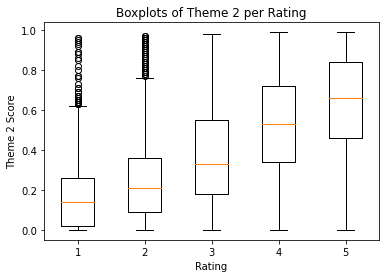

In [116]:
#create boxplot for Theme 2
rating1 = df_trim[df_trim['Rating'] == 1]['Theme_2']
rating2 = df_trim[df_trim['Rating'] == 2]['Theme_2']
rating3 = df_trim[df_trim['Rating'] == 3]['Theme_2']
rating4 = df_trim[df_trim['Rating'] == 4]['Theme_2']
rating5 = df_trim[df_trim['Rating'] == 5]['Theme_2']

plt.boxplot([rating1, rating2, rating3, rating4, rating5])
plt.title('Boxplots of Theme 2 per Rating')
plt.xlabel('Rating')
plt.ylabel('Theme 2 Score')
plt.show()

In [117]:
#Calculate Upper Floor for Rating 1 Theme 2
theme2Rating1_q1 = df_trim[df_trim['Rating'] == 1]['Theme_2'].quantile(0.25)
theme2Rating1_q3 = df_trim[df_trim['Rating'] == 1]['Theme_2'].quantile(0.75)
theme2Rating1_IQR = theme2Rating1_q3 - theme2Rating1_q1
theme2Rating1_upperFloor = theme2Rating1_q3 + (1.5 * theme2Rating1_IQR)
theme2Rating1_upperFloor

0.6200000000000001

In [120]:
#Remove outliers from Rating 1 Theme_2
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 1) & (df_trim.Theme_2 > theme2Rating1_upperFloor)].index).reset_index(drop=True)

In [121]:
len(df_trim)

32413

In [122]:
#Calculate Upper Floor for Rating 2 Theme 2
theme2Rating2_q1 = df_trim[df_trim['Rating'] == 2]['Theme_2'].quantile(0.25)
theme2Rating2_q3 = df_trim[df_trim['Rating'] == 2]['Theme_2'].quantile(0.75)
theme2Rating2_IQR = theme2Rating2_q3 - theme2Rating2_q1
theme2Rating2_upperFloor = theme2Rating2_q3 + (1.5 * theme2Rating2_IQR)
theme2Rating2_upperFloor

0.765

In [123]:
#Remove outliers from Rating 1 Theme_2
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 2) & (df_trim.Theme_2 > theme2Rating2_upperFloor)].index).reset_index(drop=True)

In [124]:
len(df_trim)

32364

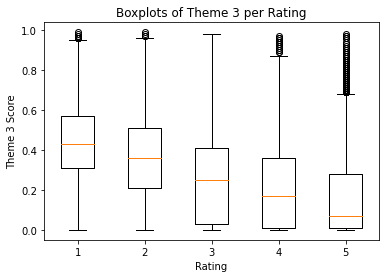

In [125]:
#create boxplot for Theme 3
rating1 = df_trim[df_trim['Rating'] == 1]['Theme_3']
rating2 = df_trim[df_trim['Rating'] == 2]['Theme_3']
rating3 = df_trim[df_trim['Rating'] == 3]['Theme_3']
rating4 = df_trim[df_trim['Rating'] == 4]['Theme_3']
rating5 = df_trim[df_trim['Rating'] == 5]['Theme_3']

plt.boxplot([rating1, rating2, rating3, rating4, rating5])
plt.title('Boxplots of Theme 3 per Rating')
plt.xlabel('Rating')
plt.ylabel('Theme 3 Score')
plt.show()

In [126]:
#Calculate Upper Floor for Rating 1 Theme 3
theme3Rating1_q1 = df_trim[df_trim['Rating'] == 1]['Theme_3'].quantile(0.25)
theme3Rating1_q3 = df_trim[df_trim['Rating'] == 1]['Theme_3'].quantile(0.75)
theme3Rating1_IQR = theme3Rating1_q3 - theme3Rating1_q1
theme3Rating1_upperFloor = theme3Rating1_q3 + (1.5 * theme3Rating1_IQR)
theme3Rating1_upperFloor

0.9599999999999999

In [127]:
#Remove outliers from Rating 1 Theme_3
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 1) & (df_trim.Theme_3 > theme3Rating1_upperFloor)].index).reset_index(drop=True)

In [128]:
len(df_trim)

32354

In [129]:
#Calculate Upper Floor for Rating 2 Theme 3
theme3Rating2_q1 = df_trim[df_trim['Rating'] == 2]['Theme_3'].quantile(0.25)
theme3Rating2_q3 = df_trim[df_trim['Rating'] == 2]['Theme_3'].quantile(0.75)
theme3Rating2_IQR = theme3Rating2_q3 - theme3Rating2_q1
theme3Rating2_upperFloor = theme3Rating2_q3 + (1.5 * theme3Rating2_IQR)
theme3Rating2_upperFloor

0.9600000000000001

In [130]:
#Remove outliers from Rating 2 Theme_3
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 2) & (df_trim.Theme_3 > theme3Rating2_upperFloor)].index).reset_index(drop=True)

In [132]:
#Calculate Upper Floor for Rating 4 Theme 3
theme3Rating4_q1 = df_trim[df_trim['Rating'] == 4]['Theme_3'].quantile(0.25)
theme3Rating4_q3 = df_trim[df_trim['Rating'] == 4]['Theme_3'].quantile(0.75)
theme3Rating4_IQR = theme3Rating4_q3 - theme3Rating4_q1
theme3Rating4_upperFloor = theme3Rating4_q3 + (1.5 * theme3Rating4_IQR)
theme3Rating4_upperFloor

0.8849999999999999

In [133]:
#Remove outliers from Rating 4 Theme_3
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 4) & (df_trim.Theme_3 > theme3Rating4_upperFloor)].index).reset_index(drop=True)

In [134]:
len(df_trim)

32333

In [135]:
#Calculate Upper Floor for Rating 5 Theme 3
theme3Rating5_q1 = df_trim[df_trim['Rating'] == 5]['Theme_3'].quantile(0.25)
theme3Rating5_q3 = df_trim[df_trim['Rating'] == 5]['Theme_3'].quantile(0.75)
theme3Rating5_IQR = theme3Rating5_q3 - theme3Rating5_q1
theme3Rating5_upperFloor = theme3Rating5_q3 + (1.5 * theme3Rating5_IQR)
theme3Rating5_upperFloor

0.685

In [136]:
#Remove outliers from Rating 5 Theme_3
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 5) & (df_trim.Theme_3 > theme3Rating5_upperFloor)].index).reset_index(drop=True)

In [137]:
len(df_trim)

32115

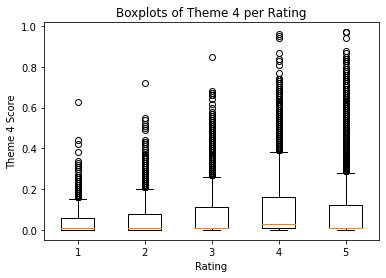

In [138]:
#create boxplot for Theme 4
rating1 = df_trim[df_trim['Rating'] == 1]['Theme_4']
rating2 = df_trim[df_trim['Rating'] == 2]['Theme_4']
rating3 = df_trim[df_trim['Rating'] == 3]['Theme_4']
rating4 = df_trim[df_trim['Rating'] == 4]['Theme_4']
rating5 = df_trim[df_trim['Rating'] == 5]['Theme_4']

plt.boxplot([rating1, rating2, rating3, rating4, rating5])
plt.title('Boxplots of Theme 4 per Rating')
plt.xlabel('Rating')
plt.ylabel('Theme 4 Score')
plt.show()

In [140]:
#Calculate Upper Floor for Rating 1 Theme 4
theme4Rating1_q1 = df_trim[df_trim['Rating'] == 1]['Theme_4'].quantile(0.25)
theme4Rating1_q3 = df_trim[df_trim['Rating'] == 1]['Theme_4'].quantile(0.75)
theme4Rating1_IQR = theme4Rating1_q3 - theme4Rating1_q1
theme4Rating1_upperFloor = theme4Rating1_q3 + (1.5 * theme4Rating1_IQR)
theme4Rating1_upperFloor

0.15

In [141]:
#Remove outliers from Rating 1 Theme 4
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 1) & (df_trim.Theme_4 > theme4Rating1_upperFloor)].index).reset_index(drop=True)

In [142]:
len(df_trim)

32039

In [143]:
#Calculate Upper Floor for Rating 2 Theme 4
theme4Rating2_q1 = df_trim[df_trim['Rating'] == 2]['Theme_4'].quantile(0.25)
theme4Rating2_q3 = df_trim[df_trim['Rating'] == 2]['Theme_4'].quantile(0.75)
theme4Rating2_IQR = theme4Rating2_q3 - theme4Rating2_q1
theme4Rating2_upperFloor = theme4Rating2_q3 + (1.5 * theme4Rating2_IQR)
theme4Rating2_upperFloor

0.2

In [144]:
#Remove outliers from Rating 2 Theme 4
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 2) & (df_trim.Theme_4 > theme4Rating2_upperFloor)].index).reset_index(drop=True)

In [145]:
len(df_trim)

31929

In [146]:
#Calculate Upper Floor for Rating 3 Theme 4
theme4Rating3_q1 = df_trim[df_trim['Rating'] == 3]['Theme_4'].quantile(0.25)
theme4Rating3_q3 = df_trim[df_trim['Rating'] == 3]['Theme_4'].quantile(0.75)
theme4Rating3_IQR = theme4Rating3_q3 - theme4Rating3_q1
theme4Rating3_upperFloor = theme4Rating3_q3 + (1.5 * theme4Rating3_IQR)
theme4Rating3_upperFloor

0.26

In [147]:
#Remove outliers from Rating 3 Theme 4
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 3) & (df_trim.Theme_4 > theme4Rating3_upperFloor)].index).reset_index(drop=True)

In [148]:
len(df_trim)

31606

In [149]:
#Calculate Upper Floor for Rating 4 Theme 4
theme4Rating4_q1 = df_trim[df_trim['Rating'] == 4]['Theme_4'].quantile(0.25)
theme4Rating4_q3 = df_trim[df_trim['Rating'] == 4]['Theme_4'].quantile(0.75)
theme4Rating4_IQR = theme4Rating4_q3 - theme4Rating4_q1
theme4Rating4_upperFloor = theme4Rating4_q3 + (1.5 * theme4Rating4_IQR)
theme4Rating4_upperFloor

0.385

In [150]:
#Remove outliers from Rating 4 Theme 4
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 4) & (df_trim.Theme_4 > theme4Rating4_upperFloor)].index).reset_index(drop=True)

In [151]:
len(df_trim)

31211

In [152]:
#Calculate Upper Floor for Rating 5 Theme 4
theme4Rating5_q1 = df_trim[df_trim['Rating'] == 5]['Theme_4'].quantile(0.25)
theme4Rating5_q3 = df_trim[df_trim['Rating'] == 5]['Theme_4'].quantile(0.75)
theme4Rating5_IQR = theme4Rating5_q3 - theme4Rating5_q1
theme4Rating5_upperFloor = theme4Rating5_q3 + (1.5 * theme4Rating5_IQR)
theme4Rating5_upperFloor

0.28500000000000003

In [153]:
#Remove outliers from Rating 5 Theme 4
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 5) & (df_trim.Theme_4 > theme4Rating5_upperFloor)].index).reset_index(drop=True)

In [154]:
len(df_trim)

29826

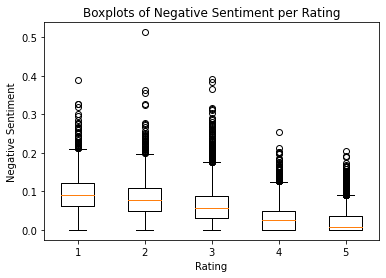

In [155]:
#create boxplot for Theme 4
rating1 = df_trim[df_trim['Rating'] == 1]['neg']
rating2 = df_trim[df_trim['Rating'] == 2]['neg']
rating3 = df_trim[df_trim['Rating'] == 3]['neg']
rating4 = df_trim[df_trim['Rating'] == 4]['neg']
rating5 = df_trim[df_trim['Rating'] == 5]['neg']

plt.boxplot([rating1, rating2, rating3, rating4, rating5])
plt.title('Boxplots of Negative Sentiment per Rating')
plt.xlabel('Rating')
plt.ylabel('Negative Sentiment')
plt.show()

In [156]:
#Calculate Upper Floor for Rating 5 Theme 4
negRating1_q1 = df_trim[df_trim['Rating'] == 1]['neg'].quantile(0.25)
negRating1_q3 = df_trim[df_trim['Rating'] == 1]['neg'].quantile(0.75)
negRating1_IQR = negRating1_q3 - negRating1_q1
negRating1_upperFloor = negRating1_q3 + (1.5 * negRating1_IQR)
negRating1_upperFloor

0.211

In [157]:
#Remove outliers from neg Rating 1
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 1) & (df_trim.neg > negRating1_upperFloor)].index).reset_index(drop=True)

In [158]:
len(df_trim)

29782

In [159]:
#Calculate Upper Floor for Rating 2 neg
negRating2_q1 = df_trim[df_trim['Rating'] == 2]['neg'].quantile(0.25)
negRating2_q3 = df_trim[df_trim['Rating'] == 2]['neg'].quantile(0.75)
negRating2_IQR = negRating2_q3 - negRating2_q1
negRating2_upperFloor = negRating2_q3 + (1.5 * negRating2_IQR)
negRating2_upperFloor

0.19874999999999998

In [160]:
#Remove outliers from neg Rating 2
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 2) & (df_trim.neg > negRating2_upperFloor)].index).reset_index(drop=True)

In [161]:
len(df_trim)

29736

In [162]:
#Calculate Upper Floor for Rating 3 neg
negRating3_q1 = df_trim[df_trim['Rating'] == 3]['neg'].quantile(0.25)
negRating3_q3 = df_trim[df_trim['Rating'] == 3]['neg'].quantile(0.75)
negRating3_IQR = negRating3_q3 - negRating3_q1
negRating3_upperFloor = negRating3_q3 + (1.5 * negRating3_IQR)
negRating3_upperFloor

0.176

In [163]:
#Remove outliers from neg Rating 2
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 3) & (df_trim.neg > negRating3_upperFloor)].index).reset_index(drop=True)

In [164]:
len(df_trim)

29619

In [165]:
#Calculate Upper Floor for Rating 4 neg
negRating4_q1 = df_trim[df_trim['Rating'] == 4]['neg'].quantile(0.25)
negRating4_q3 = df_trim[df_trim['Rating'] == 4]['neg'].quantile(0.75)
negRating4_IQR = negRating4_q3 - negRating4_q1
negRating4_upperFloor = negRating4_q3 + (1.5 * negRating4_IQR)
negRating4_upperFloor

0.125

In [166]:
#Remove outliers from neg Rating 2
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 4) & (df_trim.neg > negRating4_upperFloor)].index).reset_index(drop=True)

In [167]:
len(df_trim)

29540

In [168]:
#Calculate Upper Floor for Rating 5 neg
negRating5_q1 = df_trim[df_trim['Rating'] == 5]['neg'].quantile(0.25)
negRating5_q3 = df_trim[df_trim['Rating'] == 5]['neg'].quantile(0.75)
negRating5_IQR = negRating5_q3 - negRating5_q1
negRating5_upperFloor = negRating5_q3 + (1.5 * negRating5_IQR)
negRating5_upperFloor

0.09

In [169]:
#Remove outliers from neg Rating 5
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 5) & (df_trim.neg > negRating5_upperFloor)].index).reset_index(drop=True)

In [170]:
len(df_trim)

29183

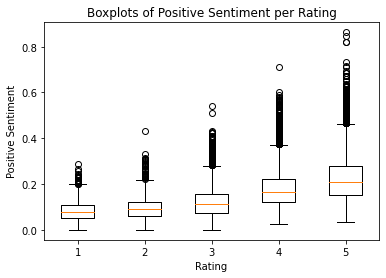

In [171]:
#create boxplot for Theme 4
rating1 = df_trim[df_trim['Rating'] == 1]['pos']
rating2 = df_trim[df_trim['Rating'] == 2]['pos']
rating3 = df_trim[df_trim['Rating'] == 3]['pos']
rating4 = df_trim[df_trim['Rating'] == 4]['pos']
rating5 = df_trim[df_trim['Rating'] == 5]['pos']

plt.boxplot([rating1, rating2, rating3, rating4, rating5])
plt.title('Boxplots of Positive Sentiment per Rating')
plt.xlabel('Rating')
plt.ylabel('Positive Sentiment')
plt.show()

In [172]:
#Calculate Upper Floor for Rating 5 Theme 4
posRating1_q1 = df_trim[df_trim['Rating'] == 1]['pos'].quantile(0.25)
posRating1_q3 = df_trim[df_trim['Rating'] == 1]['pos'].quantile(0.75)
posRating1_IQR = posRating1_q3 - posRating1_q1
posRating1_upperFloor = posRating1_q3 + (1.5 * posRating1_IQR)
posRating1_upperFloor

0.2

In [173]:
#Remove outliers from pos Rating 1
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 1) & (df_trim.pos > posRating1_upperFloor)].index).reset_index(drop=True)

In [174]:
len(df_trim)

29159

In [175]:
#Calculate Upper Floor for Rating 5 Theme 4
posRating2_q1 = df_trim[df_trim['Rating'] == 2]['pos'].quantile(0.25)
posRating2_q3 = df_trim[df_trim['Rating'] == 2]['pos'].quantile(0.75)
posRating2_IQR = posRating2_q3 - posRating2_q1
posRating2_upperFloor = posRating2_q3 + (1.5 * posRating2_IQR)
posRating2_upperFloor

0.22

In [176]:
#Remove outliers from pos Rating 1
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 2) & (df_trim.pos > posRating2_upperFloor)].index).reset_index(drop=True)

In [177]:
len(df_trim)

29125

In [178]:
#Calculate Upper Floor for Rating 3 pos
posRating3_q1 = df_trim[df_trim['Rating'] == 3]['pos'].quantile(0.25)
posRating3_q3 = df_trim[df_trim['Rating'] == 3]['pos'].quantile(0.75)
posRating3_IQR = posRating3_q3 - posRating3_q1
posRating3_upperFloor = posRating3_q3 + (1.5 * posRating3_IQR)
posRating3_upperFloor

0.281

In [179]:
#Remove outliers from pos Rating 1
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 3) & (df_trim.pos > posRating3_upperFloor)].index).reset_index(drop=True)

In [180]:
len(df_trim)

29014

In [181]:
#Calculate Upper Floor for Rating 4 pos
posRating4_q1 = df_trim[df_trim['Rating'] == 4]['pos'].quantile(0.25)
posRating4_q3 = df_trim[df_trim['Rating'] == 4]['pos'].quantile(0.75)
posRating4_IQR = posRating4_q3 - posRating4_q1
posRating4_upperFloor = posRating4_q3 + (1.5 * posRating4_IQR)
posRating4_upperFloor

0.372

In [182]:
#Remove outliers from pos Rating 1
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 4) & (df_trim.pos > posRating4_upperFloor)].index).reset_index(drop=True)

In [183]:
len(df_trim)

28798

In [184]:
#Calculate Upper Floor for Rating 4 pos
posRating5_q1 = df_trim[df_trim['Rating'] == 5]['pos'].quantile(0.25)
posRating5_q3 = df_trim[df_trim['Rating'] == 5]['pos'].quantile(0.75)
posRating5_IQR = posRating5_q3 - posRating5_q1
posRating5_upperFloor = posRating5_q3 + (1.5 * posRating5_IQR)
posRating5_upperFloor

0.4640000000000001

In [185]:
#Remove outliers from pos Rating 1
df_trim = df_trim.drop(df_trim[(df_trim.Rating == 5) & (df_trim.pos > posRating5_upperFloor)].index).reset_index(drop=True)

In [186]:
len(df_trim)

28462

In [187]:
df_Rating_trimed = df_trim.groupby('Rating')['Review_ID'].count()
df_Rating_trimed

Rating
1     1079
2     1583
3     3947
4     7266
5    14587
Name: Review_ID, dtype: int64

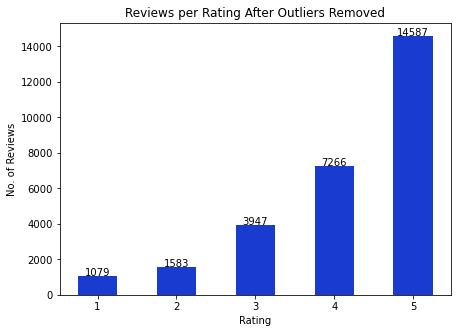

In [189]:
plt.figure(figsize = (7, 5))
plt.bar(df_Rating_trimed.index, df_Rating_trimed, color='#193bcf', width = .5)
plt.xlabel('Rating')
plt.ylabel('No. of Reviews')
plt.title('Reviews per Rating After Outliers Removed')

for i in range(1, 6):
    plt.text(i, df_Rating_trimed[i], df_Rating_trimed[i], ha='center')

plt.show;

In [204]:
model_years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [205]:
df_trim.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch', 'Year', 'Theme_0', 'Theme_1', 'Theme_2', 'Theme_3', 'Theme_4',
       'dominant_theme', 'pos', 'neg', 'sentiment'],
      dtype='object')

In [206]:
model_df = df_trim[df_trim['Year'].isin(model_years)][['Rating', 'Theme_0', 'Theme_1', 'Theme_2', 'Theme_3', 'Theme_4',
       'dominant_theme', 'pos', 'neg']]
model_df.head()

,Rating,Theme_0,Theme_1,Theme_2,Theme_3,Theme_4,dominant_theme,pos,neg
8,5,0.01,0.01,0.89,0.06,0.04,2,0.412,0.000
17,4,0.00,0.20,0.14,0.39,0.27,3,0.147,0.027
29,3,0.34,0.01,0.01,0.39,0.25,3,0.167,0.000
30,4,0.01,0.01,0.97,0.01,0.01,2,0.360,0.000
31,3,0.55,0.01,0.28,0.01,0.15,0,0.172,0.000


In [207]:
model_df = model_df.reset_index(drop=True)

In [208]:
model_df.head()

,Rating,Theme_0,Theme_1,Theme_2,Theme_3,Theme_4,dominant_theme,pos,neg
0,5,0.01,0.01,0.89,0.06,0.04,2,0.412,0.000
1,4,0.00,0.20,0.14,0.39,0.27,3,0.147,0.027
2,3,0.34,0.01,0.01,0.39,0.25,3,0.167,0.000
3,4,0.01,0.01,0.97,0.01,0.01,2,0.360,0.000
4,3,0.55,0.01,0.28,0.01,0.15,0,0.172,0.000


In [209]:
model_df_chart = model_df.groupby('Rating')['Rating'].count()
model_df_chart

Rating
1      976
2     1461
3     3675
4     6765
5    13540
Name: Rating, dtype: int64

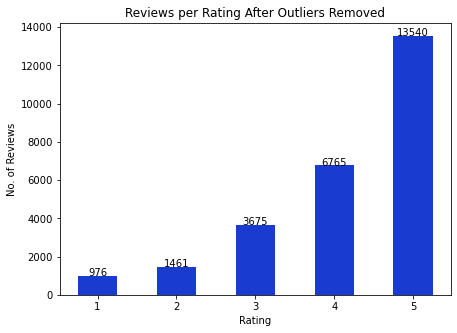

In [210]:
plt.figure(figsize = (7, 5))
plt.bar(model_df_chart.index, model_df_chart, color='#193bcf', width = .5)
plt.xlabel('Rating')
plt.ylabel('No. of Reviews')
plt.title('Reviews per Rating After Outliers Removed')

for i in range(1, 6):
    plt.text(i, model_df_chart[i], model_df_chart[i], ha='center')

plt.show;

In [211]:
modelRating5 = model_df[(model_df.Rating == 5)]
modelRating4 = model_df[(model_df.Rating == 4)]
modelRating3 = model_df[(model_df.Rating == 3)]
modelRating2 = model_df[(model_df.Rating == 2)]
modelRating1 = model_df[(model_df.Rating == 1)]

In [212]:
modelRating4resampled = resample(modelRating4, replace = True, n_samples = 13540, random_state=0)

In [214]:
modelRating3resampled = resample(modelRating3, replace = True, n_samples = 13540, random_state=0)

In [215]:
modelRating2resampled = resample(modelRating2, replace = True, n_samples = 13540, random_state=0)

In [216]:
modelRating1resampled = resample(modelRating1, replace = True, n_samples = 13540, random_state=0)

In [217]:
modelResampled_df = pd.concat([modelRating5, modelRating4resampled, modelRating3resampled, modelRating2resampled, modelRating1resampled]).reset_index(drop=True)

In [219]:
modelResampled_df_chart = modelResampled_df.groupby('Rating')['Rating'].count()
modelResampled_df_chart

Rating
1    13540
2    13540
3    13540
4    13540
5    13540
Name: Rating, dtype: int64

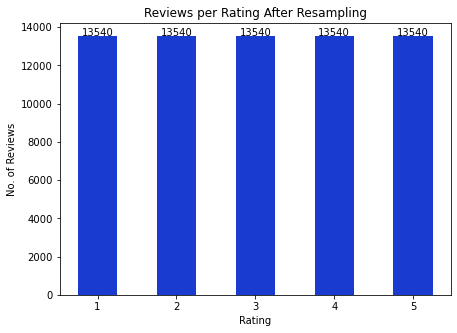

In [220]:
plt.figure(figsize = (7, 5))
plt.bar(modelResampled_df_chart.index, modelResampled_df_chart, color='#193bcf', width = .5)
plt.xlabel('Rating')
plt.ylabel('No. of Reviews')
plt.title('Reviews per Rating After Resampling')

for i in range(1, 6):
    plt.text(i, modelResampled_df_chart[i], modelResampled_df_chart[i], ha='center')

plt.show;

In [221]:
y = model_df['Rating']
x = model_df[['Theme_0', 'Theme_1', 'Theme_2', 'Theme_3', 'Theme_4',
       'dominant_theme', 'pos', 'neg']]

In [222]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)

In [236]:
kValues = [i for i in range (1, 51)]
scores = []

In [237]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [238]:
for k in kValues:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

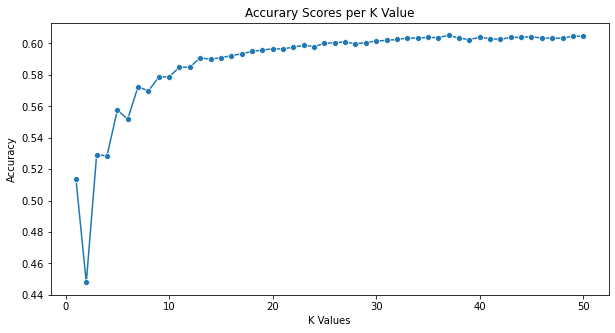

In [250]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = kValues, y = scores, marker = 'o')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('Accurary Scores per K Value')

plt.show()


In [246]:
scores_df = pd.DataFrame({'K Values': kValues, 'Accuracy': scores})

In [248]:
scores_df[scores_df.Accuracy == max(scores_df.Accuracy)]

,K Values,Accuracy
36,37,0.605179
